In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from ast import literal_eval
import seaborn as sns

In [6]:
RESULT_PATH = "final_results/result_rational_2_1736932231.csv"
# RESULT_PATH = "final_results/result_rational_1736690910.csv"
# RESULT_PATH = "final_results/result_sqrt_1736690918.csv"
# RESULT_PATH = "final_results/result_manual_1736847721.csv"
colors = sns.color_palette()
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [7]:
df = pd.read_csv(RESULT_PATH)
df.head()

,formula_gubpi,bounds,output_faza,time_faza,n_hrects,output_gubpi,time_gubpi,output_latte,time_latte,output_volesti,time_volesti,output2_volesti
0,(1.03*x**2 + 0.48*x*y + 8.88*x + 1.1*y**2 + 1....,"[[0.1, 1], [0.1, 1]]","(0.5898230890246405, 0.6896906251302616)",272.643,1284,"(0.711266057983094, 0.8710624008180216)",0.766,Not a monomial: (5381801554707743/4 + (2091359...,0.050,"(0.583847, 0.696218)",0.070,"(0.648784, 0.03218630839036996)"
1,(6.82*x**2 + 1.32*x*y + 8.69*x + 5.6*y**2 + 8....,"[[0.1, 1], [0.1, 1]]","(1.7129047384964033, 1.812863288989478)",589.094,5336,"(1.5639518246240296, 2.8058999441535044)",0.756,Not a monomial: (2488238794122199/8 + (1151232...,0.041,"(1.59775, 1.90326)",0.070,"(1.744203, 0.08964754620735582)"
2,(5.72*x**2 + 7.83*x*y + 4.6*x + 3.43*y**2 + 8....,"[[0.1, 1], [0.1, 1]]","(0.7618363752627153, 0.8617597761952512)",249.278,847,"(0.7126014688609542, 1.305862755213216)",0.799,Not a monomial: (9457559217478042.0 + (5944751...,0.039,"(0.745151, 0.881956)",0.065,"(0.8220304, 0.052084158826268864)"
3,(5.79*x**2 + 2.65*x*y + 4.62*x + 1.86*y**2 + 1...,"[[0.1, 1], [0.1, 1]]","(0.3981118938485614, 0.4980876414244374)",266.304,1061,"(0.5084030815642594, 0.6028950703253301)",0.627,Not a monomial: (8219069319951155/2 + (3670433...,0.043,"(0.417201, 0.507786)",0.063,"(0.4513803, 0.025515351967198098)"
4,(7.82*x**2 + 7.55*x*y + 3.35*x + 5.83*y**2 + 8...,"[[0.1, 1], [0.1, 1]]","(0.7253642810024395, 0.825341176037968)",486.233,3929,"(0.8289588063133213, 1.0884849667935454)",0.637,Not a monomial: (21910012187157464.0 + (776870...,0.043,"(0.711315, 0.850987)",0.061,"(0.7749078, 0.039051415861143884)"


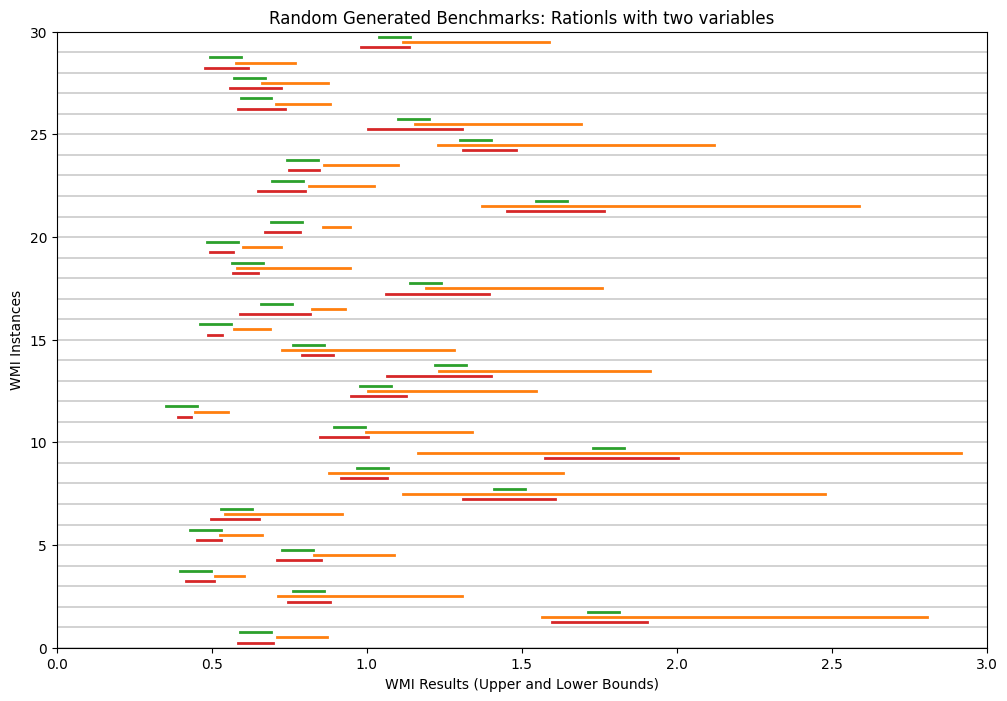

In [65]:
plt.figure(figsize=(12,8))

# n_tools = 3
# example_margin = 0.1
linewidth = 2
# tool_margin = (1-2*example_margin-n_tools*(linewidth/15))/3
# print(tool_margin)


# 15 ->0-1
y_pos = {
    0: 0.25,
    1: 0.5,
    2: 0.75
}
# for i in range(n_tools):
#     y_pos[i] = tool_margin*i+example_margin +(linewidth/15)
#     print(y_pos[i])

# Put example lines
for i, res in enumerate(df['output_faza'].apply(literal_eval)):
    plt.axhline(y=i, color='black', linestyle='-', linewidth=0.25)

for i, res in enumerate(df['output_faza'].apply(literal_eval)):
    plt.plot((res[0], res[1]), (i+y_pos[2], i+y_pos[2]), color=colors[2], linewidth=linewidth)

for i, res in enumerate(df['output_gubpi']):
    try:
        res = literal_eval(res)
        plt.plot((res[0], res[1]), (i+y_pos[1], i+y_pos[1]), color=colors[1], linewidth=linewidth)
    except:
        pass

for i, res in enumerate(df['output_volesti']):
    try:
        res = literal_eval(res)
        plt.plot((res[0], res[1]), (i+y_pos[0], i+y_pos[0]), color=colors[3], linewidth=linewidth)
    except:
        pass

plt.ylim((0,30))
plt.xlim((0,3))
plt.xlabel('WMI Results (Upper and Lower Bounds)')
plt.ylabel('WMI Instances')
plt.title('Random Generated Benchmarks: Rationls with two variables')
plt.show()